In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import lightgbm as lgb
import shap

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## 準備訓練資料(Prepare training data)

In [2]:
df_boston_housing = pd.read_csv('BostonHousing.csv')
print(df_boston_housing.keys())
df_boston_housing

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RN', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


,CRIM,ZN,INDUS,CHAS,NOX,RN,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### 定義特徵和目標變數（Define features and target variables）

In [3]:
X = df_boston_housing.drop('MEDV', axis=1)
stand = StandardScaler()
stand_X = stand.fit_transform(X)
stand_X = pd.DataFrame(stand_X, columns=X.columns)
stand_X

,CRIM,ZN,INDUS,CHAS,NOX,RN,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [4]:
y = df_boston_housing['MEDV']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

### 切割資料（cutting data）
把資料切割成訓練training data（80%）和測試testing data（20%）

In [5]:
X_train, X_test, y_train, y_test = train_test_split(stand_X, y, test_size=0.2, random_state=0)
print(X_train.shape) 
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


### 設定模型參數(Set model parameters)：
* objective: 'mse'
* num_leaves: 5

In [6]:
params = {
    'objective': 'mse',
    'num_leaves': 5
}

### 創建LightGBM數據集(Create LightGBM dataset)

In [7]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

### 訓練LightGBM模型(Train the LightGBM model)

In [8]:
num_boost_round = 50    # Execution times
model = lgb.train(
    params,
    train_data,
    num_boost_round,
    valid_sets=[train_data, test_data],
    early_stopping_rounds=None,    # Do not use early stop
)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001283 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 984
[LightGBM] [Info] Number of data points in the train set: 404, number of used features: 13
[LightGBM] [Info] Start training from score 22.611881
[1]	training's l2: 72.5961	valid_1's l2: 71.8742
[2]	training's l2: 62.5797	valid_1's l2: 63.5699
[3]	training's l2: 54.0713	valid_1's l2: 57.1382
[4]	training's l2: 46.8231	valid_1's l2: 51.4803
[5]	training's l2: 41.0549	valid_1's l2: 47.7351
[6]	training's l2: 36.3014	valid_1's l2: 43.8076
[7]	training's l2: 31.9777	valid_1's l2: 41.2428
[8]	training's l2: 28.4644	valid_1's l2: 38.8957
[9]	training's l2: 25.5785	valid_1's l2: 37.1025
[10]	training's l2: 23.093	valid_1's l2: 35.5548
[11]	training's l2: 21.0565	valid_1's l2: 34.3882
[12]	training's l2: 19.1456	valid_1's l2: 33.5143
[13]	training's l2: 17.5644	valid_1's l2: 32.7655
[14]	training's l

### 在測試集上進行預測(Predict on the test set)

In [9]:
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
y_pred

array([24.10016292, 24.70228729, 23.60682697, 11.68877314, 21.93974929,
       20.58393736, 21.95969705, 20.95903744, 21.57029297, 19.21298089,
        9.66404959, 13.39613911, 14.55074254,  9.80953069, 48.2646805 ,
       34.60906056, 22.17050949, 36.89405896, 25.35907457, 22.042734  ,
       22.93049297, 22.4630692 , 19.8043123 , 23.78698306, 20.97920468,
       17.77068481, 18.99665323, 16.90439642, 42.65046396, 18.76538366,
       16.5623922 , 16.13010176, 20.64264703, 20.7808526 , 23.73324958,
       15.74403159,  9.80953069, 21.09855407, 16.09772611, 15.18226119,
       22.66844968, 20.94363785, 23.48032723, 16.69153907, 24.08574249,
       22.80224513, 18.92588423, 16.32611815, 16.08257402, 22.54334072,
       17.01724791, 18.7418185 , 21.30847321, 42.26693557, 15.86754554,
       20.05351223, 20.68303201, 20.03843109, 18.72744875, 19.06229119,
       22.59010845, 20.7609386 , 32.40736821, 32.07573801, 18.42075683,
       29.43650043, 15.76228152, 19.71032951, 17.31447196, 21.13

### Calculate RMSE

In [10]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse:.2f}')

RMSE: 5.09


## Visual feature importance

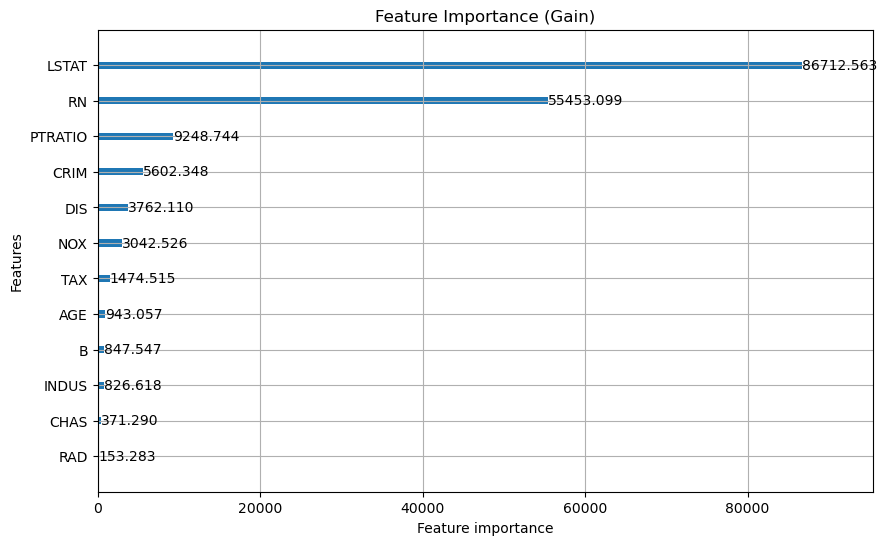

In [11]:
lgb.plot_importance(model, importance_type='gain', figsize=(10, 6), title='Feature Importance (Gain)')
plt.show()

### Visualize the first tree

<Figure size 2000x1000 with 0 Axes>

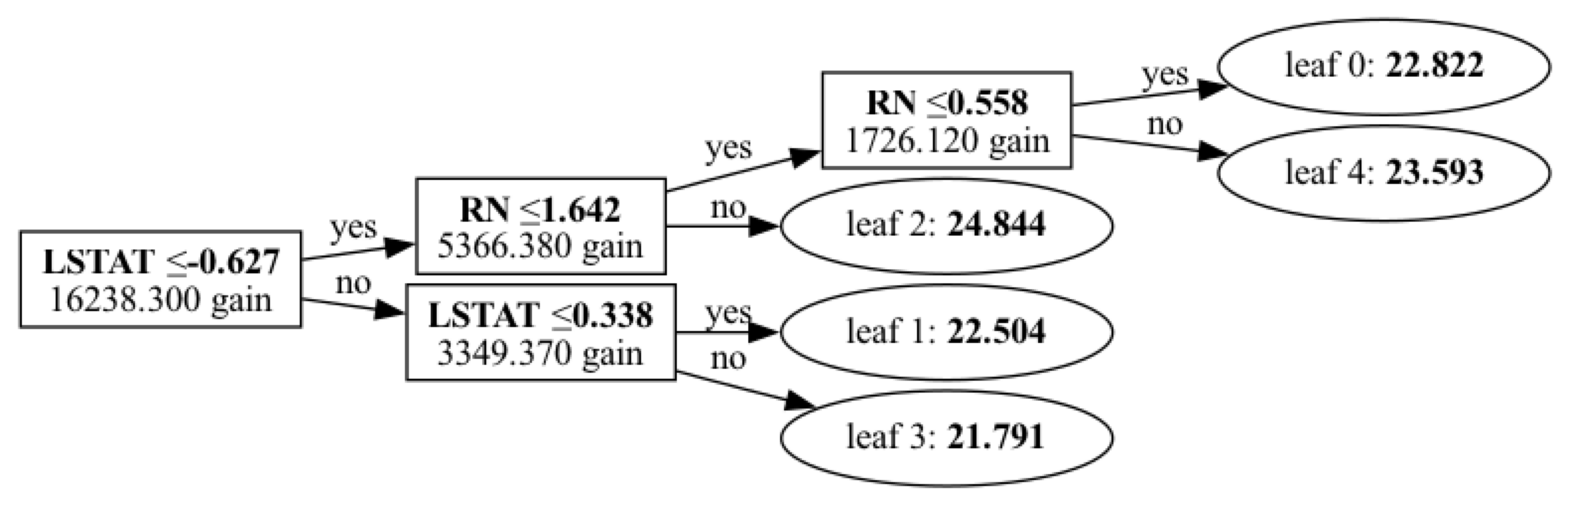

In [12]:
plt.figure(figsize=(20, 10))
lgb.plot_tree(model, tree_index=0, figsize=(20, 10), show_info=['split_gain'])
plt.show()

### Visualizing the 50th tree

<Figure size 2000x1000 with 0 Axes>

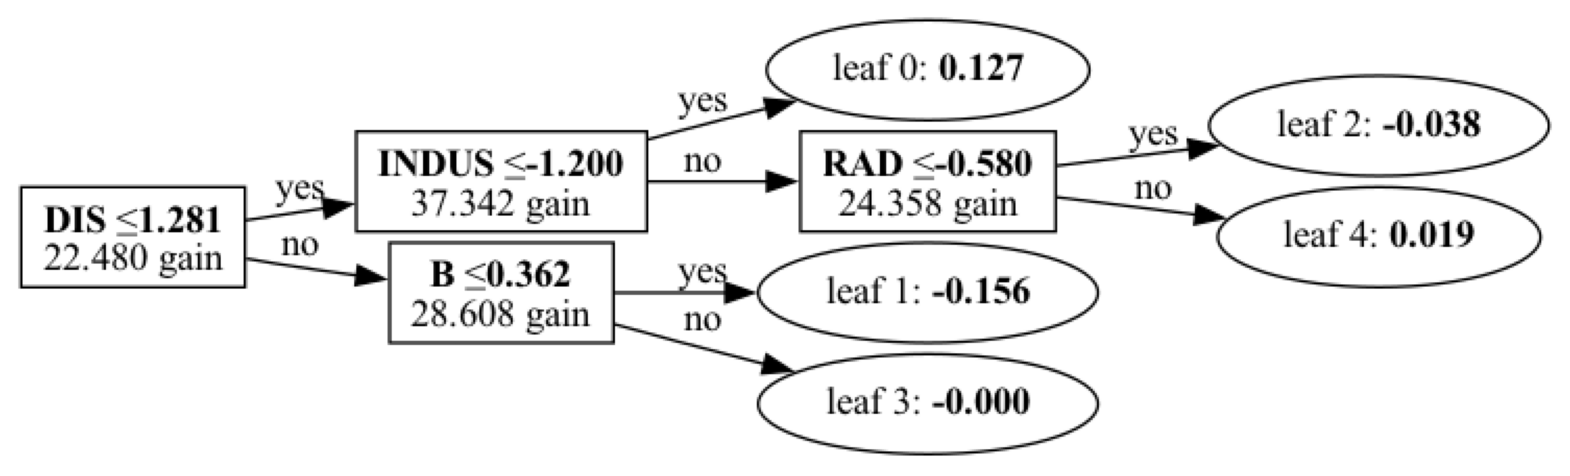

In [13]:
plt.figure(figsize=(20, 10))
lgb.plot_tree(model, tree_index=49, figsize=(20, 10), show_info=['split_gain'])
plt.show()

## 使用 SHAP 解釋模型的預測 (Interpret model predictions using SHAP)

In [14]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

### 可視化 SHAP 摘要圖(Visual SHAP summary plot)

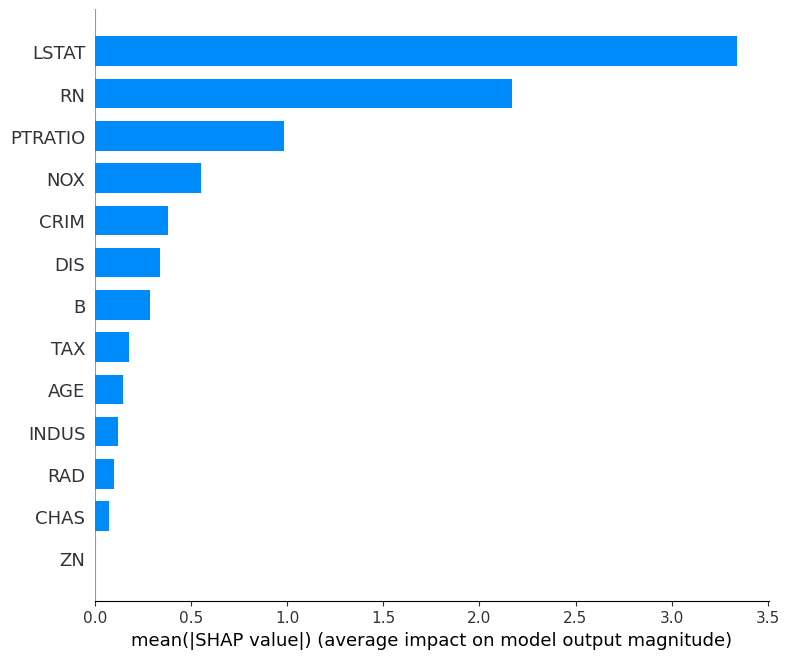

In [15]:
shap.summary_plot(shap_values, X_test, plot_type='bar')